In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6),0)

In [3]:
x.shape,y.shape

((500,), (500, 6))

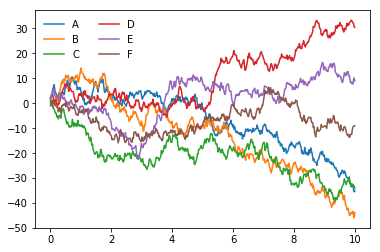

In [4]:
plt.plot(x,y)
plt.legend('ABCDEF',frameon=False,ncol=2,loc='upper left')

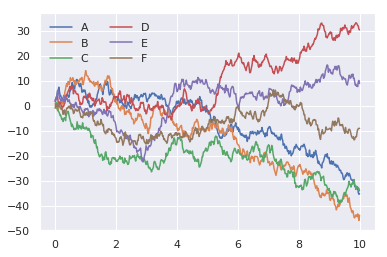

In [5]:
sns.set()
plt.plot(x,y)
plt.legend('ABCDEF',frameon=False,ncol=2,loc='upper left')

In [6]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data.shape

(2000, 2)

In [7]:
data = pd.DataFrame(data,columns=['x','y'])
data.head()

,x,y
0,-1.621426,-0.560681
1,-0.128276,0.404817
2,1.293446,-0.067047
3,0.253971,1.012278
4,-3.045710,-0.053352


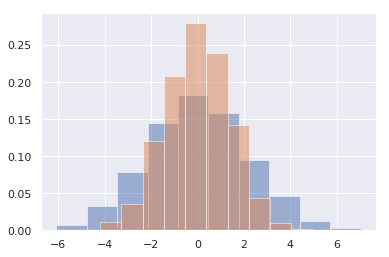

In [8]:
for col in 'xy':
    plt.hist(data[col],density=True,alpha=0.5)

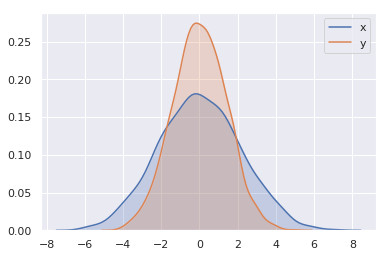

In [9]:
for col in 'xy':
    sns.kdeplot(data[col],shade=True)

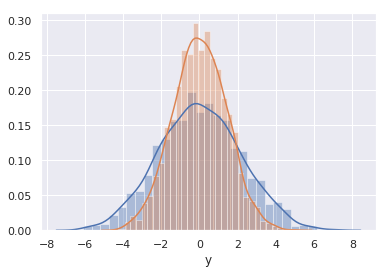

In [10]:
for col in 'xy':
    sns.distplot(data[col])

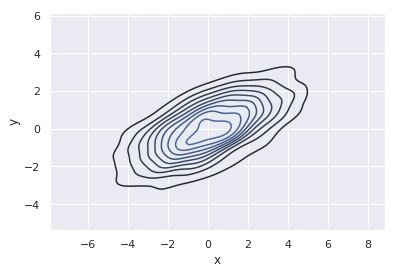

In [11]:
sns.kdeplot(data['x'],data['y'])

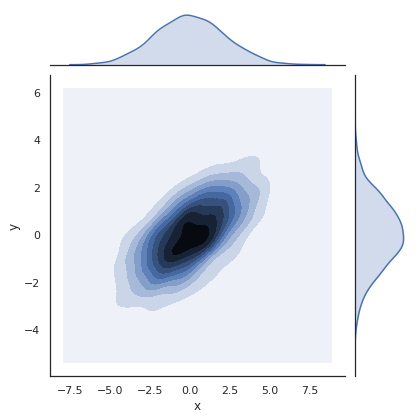

In [12]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='kde')

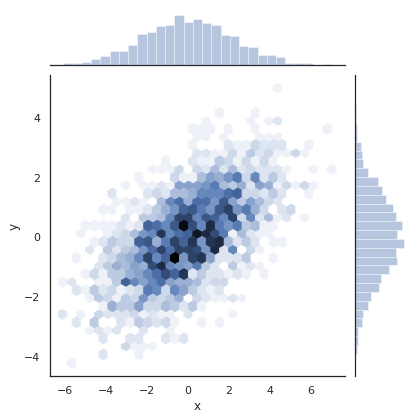

In [13]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='hex')

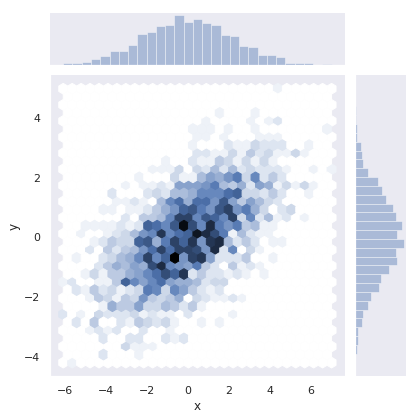

In [14]:
with sns.axes_style('dark'):
    sns.jointplot('x','y',data,kind='hex')

In [15]:
data_path = r'/root/data_analysis/datas/seaborn-data/iris.csv'
# iris = sns.load_dataset('iris')
iris = pd.read_csv(data_path)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


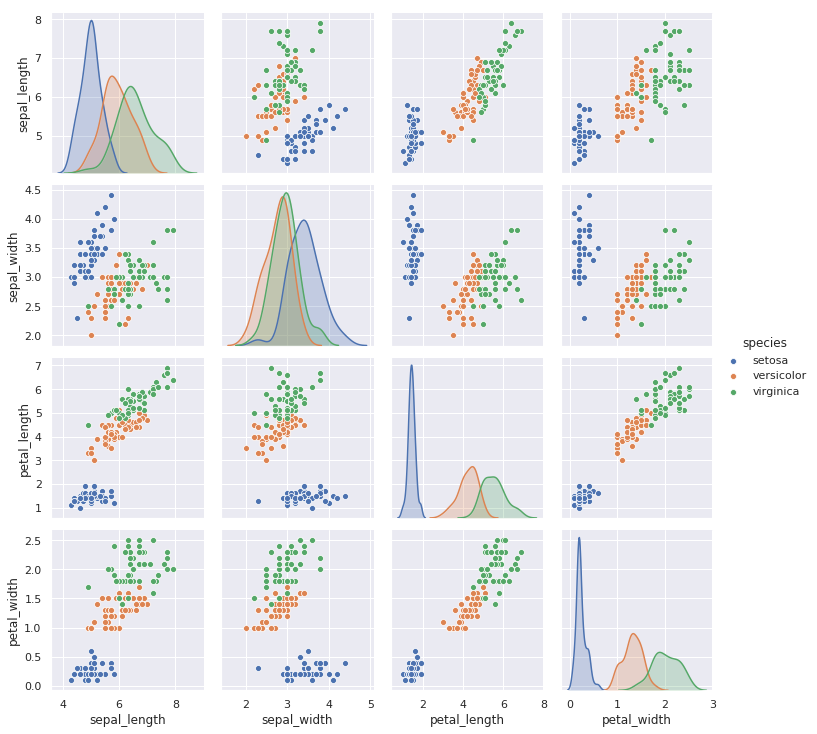

In [16]:
sns.pairplot(iris,hue='species',height=2.5)

In [17]:
tips = pd.read_csv('datas/seaborn-data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


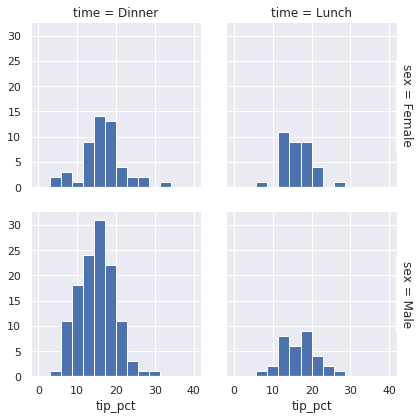

In [19]:
grid = sns.FacetGrid(data=tips,row='sex',col='time',margin_titles=True)
grid.map(plt.hist,'tip_pct',bins=np.linspace(0,40,15))

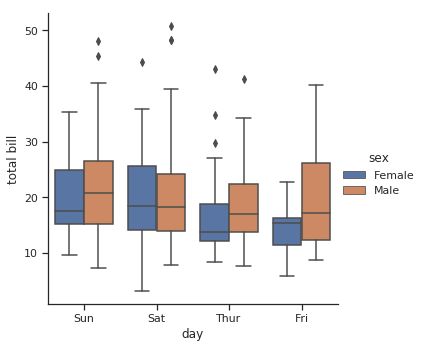

In [20]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('day','total_bill','sex',data=tips,kind='box')
    g.set_axis_labels("day",'total bill')

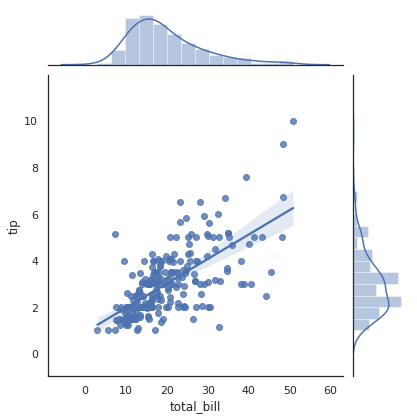

In [21]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='reg')

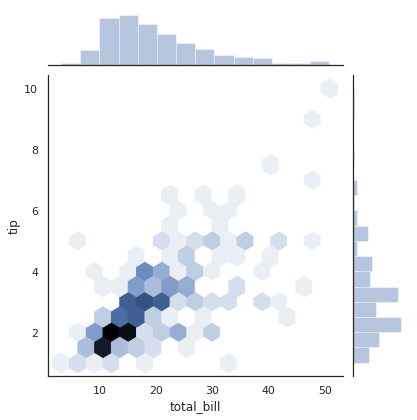

In [22]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='hex')

In [23]:
planets = pd.read_csv('datas/planets.csv')
planets.head()

,rowid,pl_discmethod,pl_pnum,pl_orbper,pl_msinij,st_dist,pl_disc
0,1,Radial Velocity,1,269.300,7.10,77.40,2006
1,2,Radial Velocity,1,874.774,2.21,56.95,2008
2,3,Radial Velocity,1,763.000,2.60,19.84,2011
3,4,Radial Velocity,1,326.030,19.40,110.62,2007
4,5,Radial Velocity,1,516.220,10.50,119.47,2009


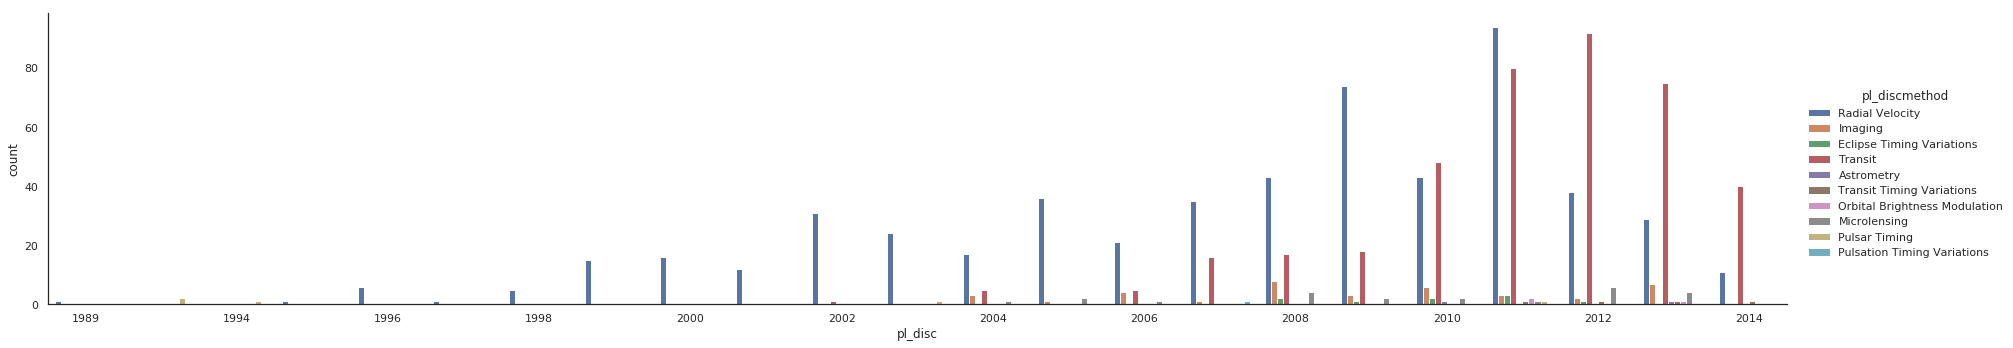

In [24]:
with sns.axes_style('white'):
    g = sns.catplot('pl_disc',data=planets,aspect=5,hue='pl_discmethod',kind='count')
    g.set_xticklabels(step=2)

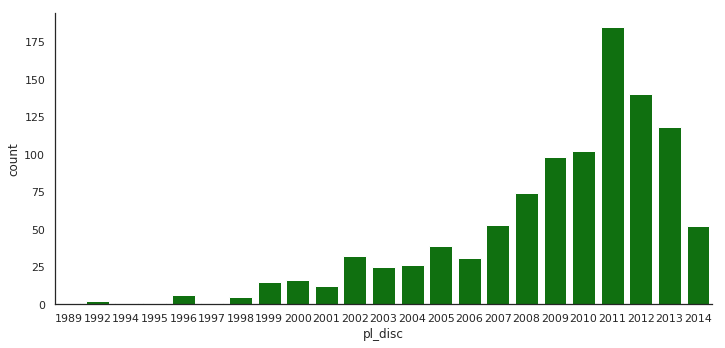

In [25]:
with sns.axes_style('white'):
    g = sns.catplot('pl_disc',data=planets,aspect=2,color='green',kind='count')
    g.set_xticklabels(step=1)

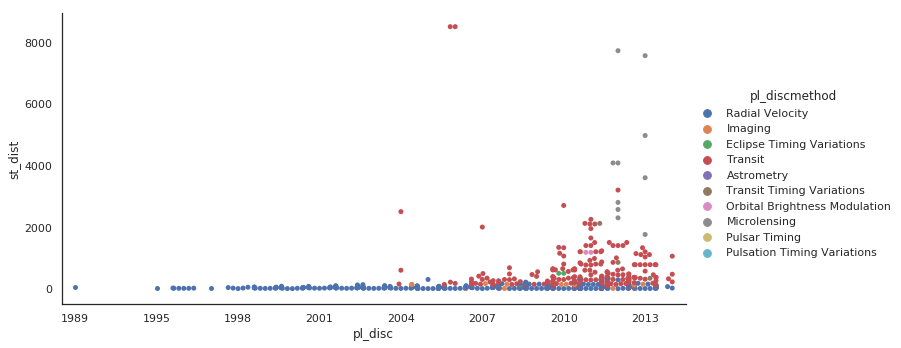

In [26]:
with sns.axes_style('white'):
    g = sns.catplot('pl_disc','st_dist',data=planets,aspect=2,hue='pl_discmethod',kind='swarm')
    g.set_xticklabels(step=3)

In [27]:
data = pd.read_csv('datas/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [28]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [29]:
def convert_time(s):
#     h,m,s = map(int,s.split(':'))
    return pd.to_timedelta(s)
data = pd.read_csv('datas/marathon-data.csv',converters={'split':convert_time,'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [30]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [31]:
data['split_sec'] = data['split'].astype(int)/1e9
data['final_sec'] = data['final'].astype(int)/1e9

In [32]:
data.dtypes

age                    int64
gender                object
split        timedelta64[ns]
final        timedelta64[ns]
split_sec            float64
final_sec            float64
dtype: object

In [33]:
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [34]:
np.linspace(4000,16000).shape

(50,)

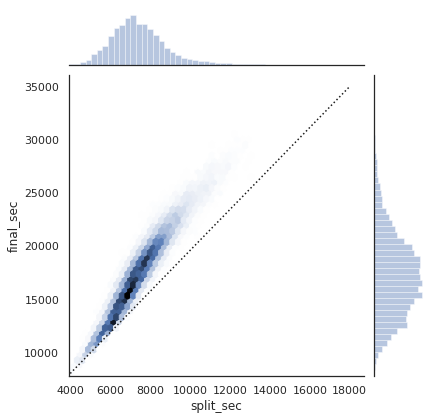

In [35]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec","final_sec",data,kind='hex')
    g.ax_joint.plot(np.linspace(4000,18000),np.linspace(8000,35000),':k')

In [36]:
np.linspace(1,20).shape

(50,)

In [37]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


In [38]:
np.round(np.arange(-0.3,0.7,0.1),decimals=1)

array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6])

([<matplotlib.axis.XTick at 0x7feee121b160>,
 <a list of 10 Text xticklabel objects>)

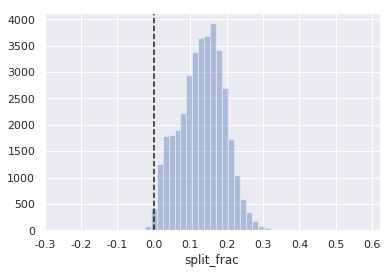

In [39]:
sns.distplot(data['split_frac'],kde=False)
plt.axvline(0,color='k',linestyle='--')
dist = np.round(np.arange(-0.3,0.7,0.1),1)
plt.xticks(dist,[str(i) for i in dist])

In [40]:
sum(data['split_frac']<0)

251

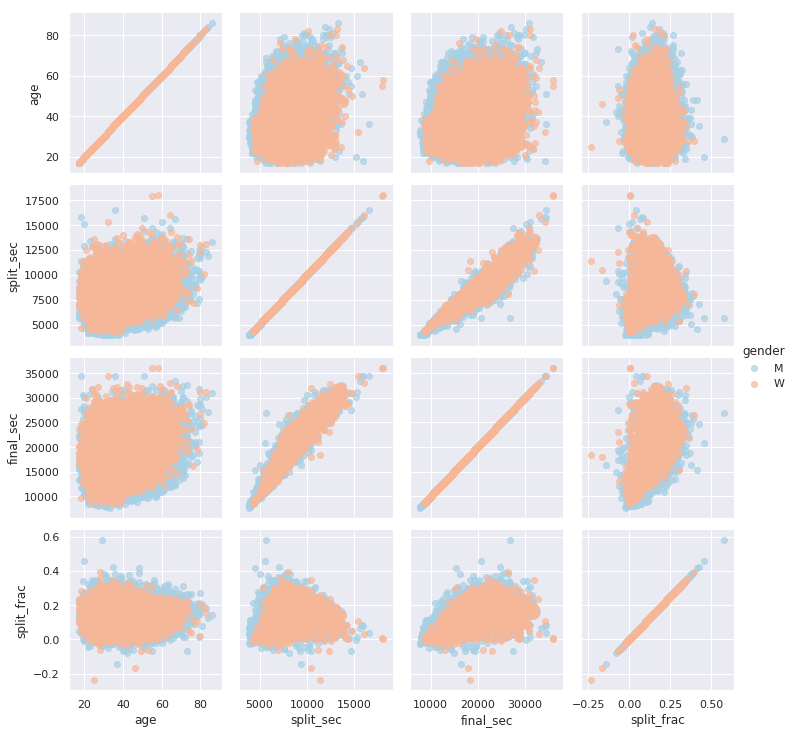

In [41]:
g = sns.PairGrid(data,vars=['age','split_sec','final_sec','split_frac'],hue='gender',palette='RdBu_r')
g.map(plt.scatter,alpha=0.7)
g.add_legend()

Text(0.5, 0, 'split_frac')

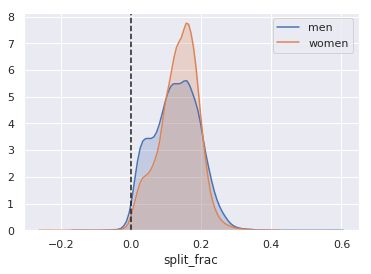

In [42]:
sns.kdeplot(data['split_frac'][data['gender']=='M'],label='men',shade=True)
sns.kdeplot(data['split_frac'][data['gender']=='W'],label='women',shade=True)
plt.axvline(0,color='k',linestyle='--')
plt.xlabel('split_frac')

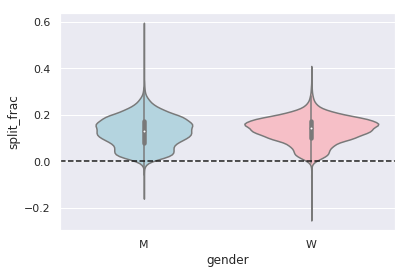

In [43]:
sns.violinplot('gender','split_frac',data=data,palette=['lightblue','lightpink'])
plt.axhline(0,color='k',linestyle='--')

In [44]:
data['age'].map(lambda age:10*(age//10))

0        30
1        30
2        30
3        30
4        30
5        30
6        20
7        30
8        30
9        30
10       20
11       20
12       20
13       20
14       30
15       20
16       20
17       30
18       20
19       30
20       20
21       30
22       40
23       20
24       20
25       30
26       20
27       20
28       30
29       30
         ..
37220    50
37221    50
37222    60
37223    50
37224    60
37225    40
37226    20
37227    70
37228    20
37229    60
37230    50
37231    30
37232    40
37233    20
37234    40
37235    30
37236    50
37237    50
37238    70
37239    60
37240    70
37241    40
37242    60
37243    60
37244    30
37245    10
37246    30
37247    50
37248    50
37249    50
Name: age, Length: 37250, dtype: int64

In [45]:
10 * (data['age']//10)

0        30
1        30
2        30
3        30
4        30
5        30
6        20
7        30
8        30
9        30
10       20
11       20
12       20
13       20
14       30
15       20
16       20
17       30
18       20
19       30
20       20
21       30
22       40
23       20
24       20
25       30
26       20
27       20
28       30
29       30
         ..
37220    50
37221    50
37222    60
37223    50
37224    60
37225    40
37226    20
37227    70
37228    20
37229    60
37230    50
37231    30
37232    40
37233    20
37234    40
37235    30
37236    50
37237    50
37238    70
37239    60
37240    70
37241    40
37242    60
37243    60
37244    30
37245    10
37246    30
37247    50
37248    50
37249    50
Name: age, Length: 37250, dtype: int64

In [46]:
data['age_dec'] = data['age'].map(lambda age:10*(age//10))

In [47]:
men = (data['gender']=='M')
women = (data['gender']=='W')

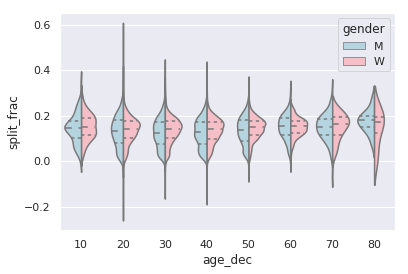

In [48]:
with sns.axes_style(style=None):
    sns.violinplot("age_dec","split_frac",hue='gender',data=data,split=True,inner='quartile',palette=['lightblue','lightpink'])

In [49]:
np.sum(data['age']>80)

7

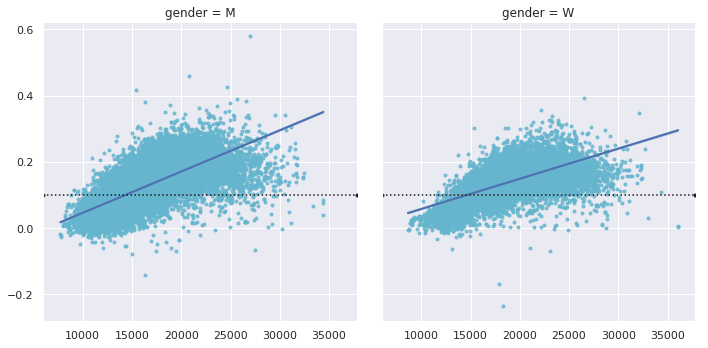

In [50]:
g = sns.lmplot('final_sec','split_frac',col='gender',data=data,markers=".",scatter_kws={'color':'c'})
g.map(plt.axhline,y=0.1,color='k',ls=':')

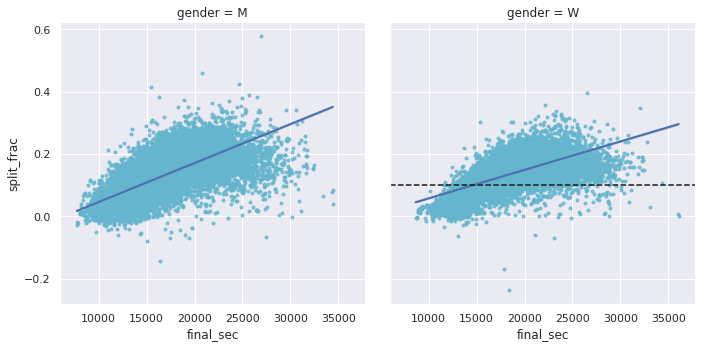

In [51]:
sns.lmplot('final_sec','split_frac',col='gender',data=data,markers=".",scatter_kws={'color':'c'})
plt.axhline(0.1,color='k',linestyle='--')